In [1]:
# Import statements
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
piracy_df_original = pd.read_csv('Data_Files\[Clean] IMO Piracy - 2000 to 2022 (PDV 01-2023).csv')
# pd.concat([piracy_df_original.head(), piracy_df_original.tail()])
piracy_df_original.head(1)

Incident Date Ship Name Ship Flag Ship Type                     Area  \
0     3/18/2010  AL-ASA'A     Yemen      Dhow  In international waters   

   Latitude  Longitude Consequences to Crew Part of Ship Raided Ship Status  \
0       NaN        NaN        Ship Hijacked          Not Stated  Not Stated   

           Weapons Used  Flag - Crew Injuries  Flag - Crew Held Hostage  \
0  None or Not Reported                 False                      True   

   Flag - Crew Missing  Flag - Crew Deaths  Flag - Crew Assaulted  
0                False               False                  False

In [3]:
piracy_df_imo = pd.read_csv('Data_Files/[Dirty]_ListOfIncidents_IMO.csv')
# pd.concat([piracy_df_imo.head(), piracy_df_imo.tail()])
piracy_df_imo.head()

Date          Ship Name             Ship Type  IMO No.  \
0   7/22/94  PAVELS STERNBERGS                Reefer  7362366   
1    9/9/94           BONSELLA                   NaN      NaN   
2  10/23/94            SIBOELF  Ore/Bulk/oil carrier  9011935   
3  10/26/94       TROPICAL SUN                   NaN      NaN   
4  11/17/94             ANOMIS                   NaN  7233711   

                    Area  Boarded? Latitude Longitude  \
0  In territorial waters       NaN      NaN       NaN   
1  In territorial waters       NaN      NaN       NaN   
2           In port area       NaN      NaN       NaN   
3           In port area       NaN      NaN       NaN   
4  In territorial waters       NaN      NaN       NaN   

                                    Incident details  \
0  Ship boarded by seven men armed with big cable...   
1  Twenty-six bandits posing as Coast Guard hijac...   
2  6-7 pirates wearing masks, armed with pistols ...   
3  Ship attacked with mortar shells which fell ab...   
4  Boat opened fire on ship after trying unsucces...   

                           Consequences for crew etc  \
0  Deck watchman was slightly wounded and some sh...   
1                      Ship's cargo and money stolen   
2      Personal belongings and cash stolen from crew   
3                                                NaN   
4                                                  -   

                         Action taken by master/crew  Reported?  \
0  Chief officer and other crew members came to t...       True   
1                                                  -       True   
2  The watchman saw the pirates and informed term...       True   
3                                                  -       True   
4                                                  -       True   

                          Reported to... Reporting State  \
0  Incident reported to Port Authorities          Latvia   
1                                    Yes   United States   
2                      Terminal informed          Norway   
3                                    Yes   United States   
4                                    Yes   United States   

  Coastal State Action Taken  MSC/Circ  
0                        NaN       719  
1                          -       698  
2                    Unknown       708  
3                          -       698  
4                          -       698

In [4]:
#test_df = piracy_df_imo.merge(piracy_df_original, on=['Ship Name'], how = 'inner' )

In [5]:
#test_df.head()

In [6]:
#piracy_df_original['Part of Ship Raided'].value_counts()

In [7]:
#piracy_df_original['Consequences to Crew'].value_counts()

In [8]:
#piracy_df_original['Flag - Crew Injuries'].value_counts()

In [9]:
#piracy_df_original['Flag - Crew Held Hostage'].value_counts()

In [10]:
#piracy_df_original['Flag - Crew Missing'].value_counts()

In [11]:
#piracy_df_original['Flag - Crew Deaths'].value_counts()

In [12]:
#piracy_df_original['Flag - Crew Assaulted'].value_counts()

In [13]:
piracy_df_original['Ship Type'].unique()

array(['Dhow', 'Fishing vessel', 'Tanker', 'Supply ship',
       'General cargo ship', 'Tug', 'Container ship', 'Yacht',
       'Bulk carrier', 'Chemical tanker', 'General dry cargo ship',
       'Not Reported', 'Vehicle carrier', 'Ro-ro-cargo ship',
       'Oil product tanker', 'Product tanker',
       'Mobile offshore drilling unit', 'Barge carrier', 'LPG tanker',
       'Oil tanker', 'Rescue/standby ship', 'Refrigerated cargo carrier',
       'Livestock carrier', 'Passenger ship', 'Special purpose ship',
       'Ro-Ro-cargo ship', 'Gas carrier-LPG', 'Reefer', 'Landing craft',
       'Cable-Layer', 'Ore/bulk/oil carrier', 'Barge', 'Fishing trawler',
       'Heavy load carrier', 'Gas carrier - LNG', 'Chemical Tanker',
       'Ore/bulk/oil Carrier', 'Research ship', 'Multi purpose ship',
       'Cutter/dredger', 'Container', 'Refrigerated ship',
       'Fishing vessels', 'Product Tanker', 'Boat', 'Unknown',
       'Barter Trade Boat', 'LPG', 'Oil Tanker', 'Ferry',
       'Cement carrie

In [14]:
piracy_df_map = piracy_df_original.dropna(subset=['Latitude','Longitude']) #drop lat/long nulls for a map

### Adding severity column to piracy_df_original and piracy_df_map
Note: this is probably not the most efficent way to do this but end result works 

In [15]:
severe_df_1 = piracy_df_original[(piracy_df_original['Flag - Crew Deaths'] == True) | (piracy_df_original['Flag - Crew Missing'] == True)]
severe_df_1.loc[:, 'severity'] = 'high'

C:\Users\julia\AppData\Local\Temp\ipykernel_24512\1106860534.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severe_df_1.loc[:, 'severity'] = 'high'


In [16]:
medium_df_1 = piracy_df_original[(piracy_df_original['Flag - Crew Assaulted'] == True) | (piracy_df_original['Flag - Crew Injuries'] == True) | (piracy_df_original['Flag - Crew Held Hostage'] == True)]
medium_df_1.loc[:, 'severity'] = 'medium'

C:\Users\julia\AppData\Local\Temp\ipykernel_24512\2775515484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_df_1.loc[:, 'severity'] = 'medium'


In [17]:
low_df_1 = piracy_df_original[(piracy_df_original['Flag - Crew Assaulted'] == False) & (piracy_df_original['Flag - Crew Injuries'] == False) & (piracy_df_original['Flag - Crew Held Hostage'] == False) & (piracy_df_original['Flag - Crew Deaths'] == False) & (piracy_df_original['Flag - Crew Missing'] == False)]
low_df_1.loc[:, 'severity'] = 'low'

C:\Users\julia\AppData\Local\Temp\ipykernel_24512\2010689783.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df_1.loc[:, 'severity'] = 'low'


In [18]:
dfs1 = [ low_df_1, medium_df_1, severe_df_1]

In [19]:
piracy_df_original = pd.concat(dfs1).reset_index(drop=True) 

In [20]:
piracy_df_original.head(1)

Incident Date Ship Name Ship Flag Ship Type                     Area  \
0     5/25/2010  AL JAWAT     Yemen      Dhow  In international waters   

   Latitude  Longitude Consequences to Crew Part of Ship Raided Ship Status  \
0       NaN        NaN        Ship Hijacked          Not Stated    Steaming   

           Weapons Used  Flag - Crew Injuries  Flag - Crew Held Hostage  \
0  None or Not Reported                 False                     False   

   Flag - Crew Missing  Flag - Crew Deaths  Flag - Crew Assaulted severity  
0                False               False                  False      low

In [21]:
severe_df = piracy_df_map[(piracy_df_map['Flag - Crew Deaths'] == True) | (piracy_df_map['Flag - Crew Missing'] == True)]

In [22]:
severe_df.loc[:,'severity'] = 'high'

C:\Users\julia\AppData\Local\Temp\ipykernel_24512\4221456090.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  severe_df.loc[:,'severity'] = 'high'


In [23]:
medium_df = piracy_df_map[(piracy_df_map['Flag - Crew Assaulted'] == True) | (piracy_df_map['Flag - Crew Injuries'] == True) | (piracy_df_map['Flag - Crew Held Hostage'] == True)]

In [24]:
medium_df.loc[:, 'severity'] = 'medium'

C:\Users\julia\AppData\Local\Temp\ipykernel_24512\499160110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  medium_df.loc[:, 'severity'] = 'medium'


In [25]:
low_df = piracy_df_map[(piracy_df_map['Flag - Crew Assaulted'] == False) & (piracy_df_map['Flag - Crew Injuries'] == False) & (piracy_df_map['Flag - Crew Held Hostage'] == False) & (piracy_df_map['Flag - Crew Deaths'] == False) & (piracy_df_map['Flag - Crew Missing'] == False)]

In [26]:
low_df.loc[:, 'severity'] = 'low'

C:\Users\julia\AppData\Local\Temp\ipykernel_24512\4046020113.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_df.loc[:, 'severity'] = 'low'


In [27]:
dfs = [ low_df, medium_df, severe_df]

In [28]:
piracy_df_map = pd.concat(dfs).reset_index(drop=True) 

In [29]:
piracy_df_map.head(1)

Incident Date Ship Name Ship Flag Ship Type                     Area  \
0     4/21/2012   ALABASS     Yemen      Dhow  In international waters   

    Latitude  Longitude Consequences to Crew Part of Ship Raided Ship Status  \
0  15.333333       52.2        Ship Hijacked          Not Stated    Steaming   

           Weapons Used  Flag - Crew Injuries  Flag - Crew Held Hostage  \
0  None or Not Reported                 False                     False   

   Flag - Crew Missing  Flag - Crew Deaths  Flag - Crew Assaulted severity  
0                False               False                  False      low

In [30]:
import folium
from streamlit_folium import st_folium
import streamlit as st

# Create a map using Folium
map_center = [piracy_df_original['Latitude'].mean(), piracy_df_original['Longitude'].mean()]
m = folium.Map(location=map_center, zoom_start=4)

# Add markers for vessel type, ship status, and country
for index, row in severe_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Ship Origin: {row['Ship Flag']}<br>Latitude:{row['Latitude']}<br>Longitude: {row['Longitude']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='black', fill=True, fill_color='black', popup=popup_text).add_to(m)

for index, row in medium_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Ship Origin: {row['Ship Flag']}<br>Latitude:{row['Latitude']}<br>Longitude: {row['Longitude']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='red', fill=True, fill_color='red', popup=popup_text).add_to(m)

for index, row in low_df.iterrows():
    popup_text = f"Vessel Type: {row['Ship Type']}<br>Ship Status: {row['Ship Status']}<br>Ship Origin: {row['Ship Flag']}<br>Latitude:{row['Latitude']}<br>Longitude: {row['Longitude']}"
    folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color='yellow', fill=True, fill_color='yellow', popup=popup_text).add_to(m)

#example box need to figure out exact area to investigate

top_left1 = [7, -1] #west neg 
bottom_right1 = [-2,10] #south eng 
Gulf_Guinea = folium.Rectangle(bounds=[top_left1, bottom_right1], color='black', fill=False)
Gulf_Guinea.add_to(m)

top_left2 = [20, 40] #west neg 
bottom_right2 = [10, 55.17] #south neg 
Gulf_Aden = folium.Rectangle(bounds=[top_left2, bottom_right2], color='black', fill=False)
Gulf_Aden.add_to(m)

top_left3 = [10, 93] #west neg 
bottom_right3 = [-10, 110] #south neg 
Strait_Malacca = folium.Rectangle(bounds=[top_left3, bottom_right3], color='black', fill=False)
Strait_Malacca.add_to(m)

#legend
legend_html = '''
     <div style="position: fixed; bottom: 50px; left: 50px; width: 200px; height: 120px; background-color: white; border:2px solid grey; z-index:9999; font-size:14px;">
     <p><strong>Legend</strong></p>
     <p><i class="fa fa-circle fa-1x" style="color:black"></i> Severe</p>
     <p><i class="fa fa-circle fa-1x" style="color:red"></i> Medium</p>
     <p><i class="fa fa-circle fa-1x" style="color:yellow"></i> Low</p>
     </div>
     '''
m.get_root().html.add_child(folium.Element(legend_html))

# Display the map
m.save('piracy_map.html')



In [31]:
m

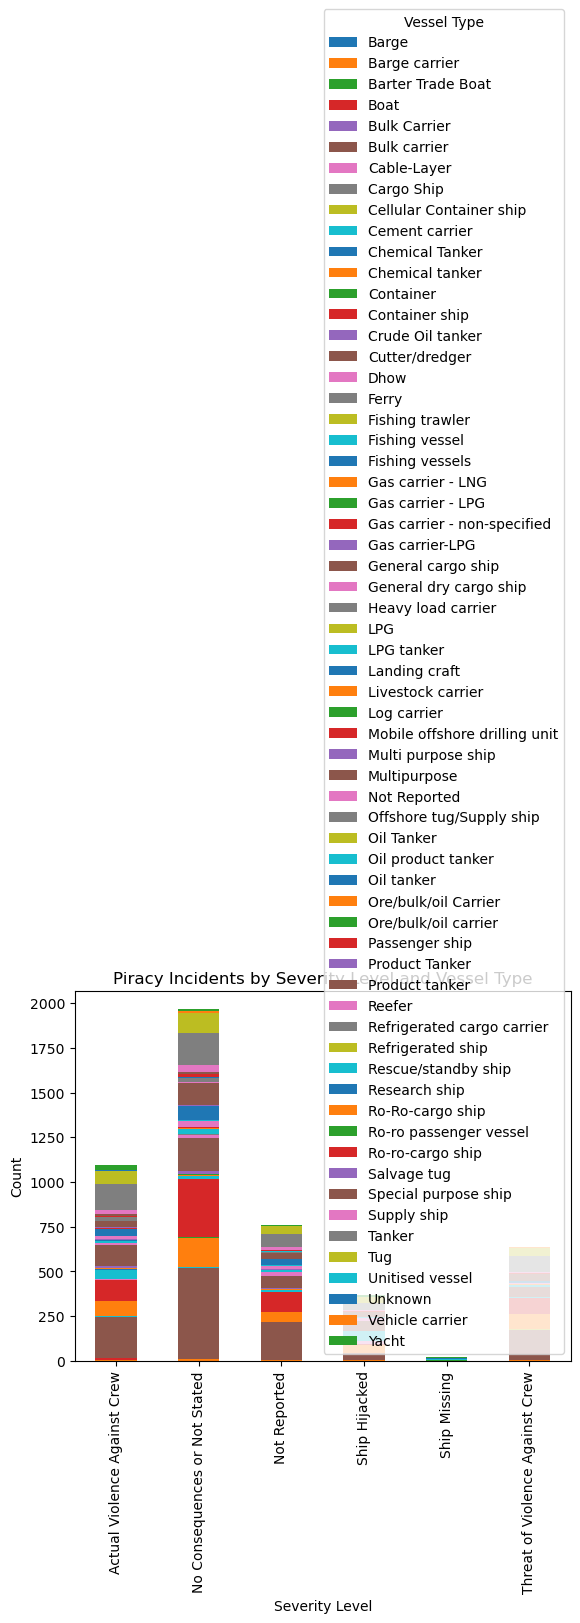

In [32]:
#big picture 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming piracy_original_df is your DataFrame containing the piracy incidents data
# Group the data by severity level and vessel type, and count the occurrences
severity_vessel_counts = piracy_df_original.groupby(['Consequences to Crew', 'Ship Type']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Severity Level and Vessel Type')
plt.legend(title='Vessel Type')
#plt.show()

In [33]:
vessel_type_mapping = {
    'Cargo ships': ['General cargo ship', 'Container ship', 'Container', 'General dry cargo ship', 'Bulk carrier', 'Bulk Carrier', 
                    'Vehicle carrier', 'Ro-ro-cargo ship','Ro-Ro-cargo', 'Refrigerated cargo carrier', 
                    'Livestock carrier', 'Reefer', 'Cable-Layer', 'Ore/bulk/oil carrier', 
                    'Ore/bulk/oil Carrier',  'Cellular Container ship',
                    'Cargo Ship', 'Log carrier', 'Unitised vessel','Cement carrier','Heavy load carrier','Barge carrier'],
    
    'Fishing': ['Fishing vessel', 'Fishing trawler', 'Fishing vessels'],

    'Non commercial ships': ['Research ship','Rescue/standby ship'],

    'Passenger ships': ['Dhow','Ro-ro passenger vessel', 'Ferry', 'Passenger ship', 'Yacht'],

    'Service ships': ['Salvage tug','Tug', 'Supply ship', 'Offshore tug/Supply ship'],

    'Tankers': ['Tanker', 'Chemical tanker', 'Chemical Tanker', 'Oil product tanker', 'Product tanker', 'Product Tanker', 
                'LPG tanker', 'Oil tanker', 'Oil Tanker','Gas carrier-LPG', 'Gas carrier - LPG', 'LPG', 'Gas carrier - LNG','Gas carrier - non-specified',
                'Crude Oil tanker'],

    'All others': ['Cutter/dredger', 'Barge', 'Barge Mobile offshore drilling unit', 'Refrigerated ship', 'Boat', 'Barter Trade Boat', 
                    'Multi purpose ship','Multipurpose','Special purpose ship', 'Landing craft'],

    'Unknown': ['Not Reported', 'Unknown']}

In [34]:
# Function to map vessel types to categories
def map_vessel_type(vessel_type):
    for category, types in vessel_type_mapping.items():
        if vessel_type in types:
            return category



In [35]:
piracy_df_original['Vessel Category'] = piracy_df_original['Ship Type'].map(map_vessel_type) #map the categories to the new types 


In [36]:
# Define the range of latitude and longitude values
#strait of malacca 
min_lat = -10
max_lat = 10
min_lon = 93
max_lon = 150.0

# Filter the DataFrame based on the range of latitude and longitude values make sure to use piracy_df_map bc null values will mess up the dataframe
strait_malacca_df = piracy_df_map[(piracy_df_map['Latitude'] >= min_lat) & (piracy_df_map['Latitude'] <= max_lat) &
                                  (piracy_df_map['Longitude'] >= min_lon) & (piracy_df_map['Longitude'] <= max_lon)]

# Display the filtered DataFrame

In [37]:
strait_malacca_df.loc[:,'Vessel Category'] = strait_malacca_df['Ship Type'].map(map_vessel_type)


C:\Users\julia\AppData\Local\Temp\ipykernel_24512\1065735473.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strait_malacca_df.loc[:,'Vessel Category'] = strait_malacca_df['Ship Type'].map(map_vessel_type)


In [38]:
#Gulf Eden  

min_lat = 10
max_lat = 20
min_lon = 93
max_lon = 110.0

# Filter the DataFrame based on the range of latitude and longitude values make sure to use piracy_df_map bc null values will mess up the dataframe
gulf_of_eden_df = piracy_df_map[(piracy_df_map['Latitude'] >= min_lat) & (piracy_df_map['Latitude'] <= max_lat) &
                                  (piracy_df_map['Longitude'] >= min_lon) & (piracy_df_map['Longitude'] <= max_lon)]

# Display the filtered DataFrame

In [39]:
gulf_of_eden_df.loc[:,'Vessel Category'] = gulf_of_eden_df['Ship Type'].map(map_vessel_type)


C:\Users\julia\AppData\Local\Temp\ipykernel_24512\2265968537.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gulf_of_eden_df.loc[:,'Vessel Category'] = gulf_of_eden_df['Ship Type'].map(map_vessel_type)


In [40]:
#Gulf of Guinea
min_lat = -2
max_lat = 7
min_lon = -1
max_lon = 10

# Filter the DataFrame based on the range of latitude and longitude values make sure to use piracy_df_map bc null values will mess up the dataframe
gulf_of_guinea_df = piracy_df_map[(piracy_df_map['Latitude'] >= min_lat) & (piracy_df_map['Latitude'] <= max_lat) &
                                  (piracy_df_map['Longitude'] >= min_lon) & (piracy_df_map['Longitude'] <= max_lon)]

# Display the filtered DataFrame

In [41]:
gulf_of_guinea_df.loc[:,'Vessel Category'] = gulf_of_guinea_df['Ship Type'].map(map_vessel_type)


C:\Users\julia\AppData\Local\Temp\ipykernel_24512\997917489.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gulf_of_guinea_df.loc[:,'Vessel Category'] = gulf_of_guinea_df['Ship Type'].map(map_vessel_type)


### All DataFrames created:

In [42]:
###The specific dataframes for our box areas.
piracy_df_original #original dataframe that includes all events regardless of whether lat/longs are available
piracy_df_map #contains only data that includes lat/long in order to plot on map
strait_malacca_df
gulf_of_eden_df
gulf_of_guinea_df

Incident Date           Ship Name                         Ship Flag  \
2        12/4/2018       SAAVEDRA TIDE                           Vanuatu   
47      12/19/2020        Maersk Cadiz                         Singapore   
48      12/22/2020  BW Pavilion Leeara                         Singapore   
50       11/7/2020      Torm Alexandra                         Singapore   
66       9/23/2019      GRACE VICTORIA                         Singapore   
...            ...                 ...                               ...   
2809    11/16/2020            AM Delta                             Ghana   
2811      2/9/2018          Luwen-Yu 2                             China   
2816      9/5/2021              Tampen             Saint Kitts and Nevis   
2817     4/29/2014         SP BRUSSELS                  Marshall Islands   
2830      8/3/2012           JASCON 33  Saint Vincent and the Grenadines   

               Ship Type                     Area  Latitude  Longitude  \
2            Supply ship  In international waters  3.133333   6.333333   
47        Container ship  In international waters  2.613167   6.203167   
48            LPG tanker  In international waters  2.441667   5.415000   
50       Chemical tanker  In international waters  3.520500   2.559000   
66        Product tanker    In territorial waters  6.295000   3.235000   
...                  ...                      ...       ...        ...   
2809  General cargo ship    In territorial waters  3.545000   6.156500   
2811      Fishing vessel    In territorial waters  4.100000   8.850000   
2816         Supply ship             In port area  0.373000   9.404500   
2817  Oil product tanker  In international waters  4.933333   4.816667   
2830       Barge carrier  In international waters  3.766667   6.666667   

                 Consequences to Crew            Part of Ship Raided  \
2                        Not Reported                     Not Stated   
47                       Not Reported                     Not Stated   
48      No Consequences or Not Stated                     Not Stated   
50                       Not Reported                     Not Stated   
66    Threat of Violence Against Crew                     Not Stated   
...                               ...                            ...   
2809     Actual Violence Against Crew                     Not Stated   
2811     Actual Violence Against Crew                     Not Stated   
2816                     Not Reported                     Not Stated   
2817                    Ship Hijacked                     Not Stated   
2830     Actual Violence Against Crew  Master and Crew Accomodations   

     Ship Status          Weapons Used  Flag - Crew Injuries  \
2       Steaming  None or Not Reported                 False   
47      Steaming  None or Not Reported                 False   
48      Steaming  None or Not Reported                 False   
50      Steaming  None or Not Reported                 False   
66     At Anchor  None or Not Reported                 False   
...          ...                   ...                   ...   
2809    Steaming              Firearms                 False   
2811  Not Stated              Firearms                 False   
2816   At Anchor              Firearms                  True   
2817    Steaming              Firearms                  True   
2830   At Anchor              Firearms                  True   

      Flag - Crew Held Hostage  Flag - Crew Missing  Flag - Crew Deaths  \
2                        False                False               False   
47                       False                False               False   
48                       False                False               False   
50                       False                False               False   
66                       False                False               False   
...                        ...                  ...                 ...   
2809                      True              

In [ ]:
from bokeh.models import TabPanel, Tabs, Tooltip
from bokeh.models.layouts import Row
from bokeh.plotting import figure, show
from bokeh.io import output_file, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource
from bokeh.layouts import column
from bokeh.models import TabPanel, Tabs, Tooltip

### Big Picture Bokeh, globally: ill finish at the end if we have time but going to focus on NAIs

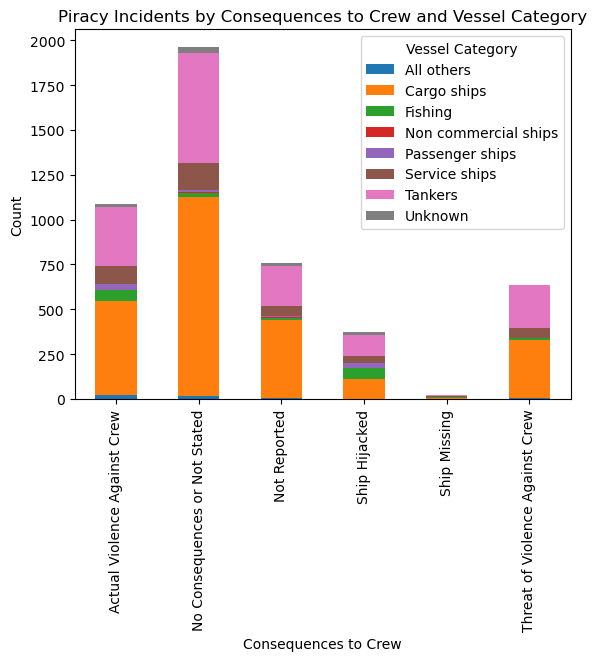

In [43]:
#Bid picture across the globe. 

C_Crew_vessel_cat = piracy_df_original.groupby(['Consequences to Crew', 'Vessel Category']).size().unstack(fill_value=0)

# Plot the bar graph
C_Crew_vessel_cat.plot(kind='bar', stacked=True)
plt.xlabel('Consequences to Crew')
plt.ylabel('Count')
plt.title('Piracy Incidents by Consequences to Crew and Vessel Category')
plt.legend(title='Vessel Category')
plt.show()

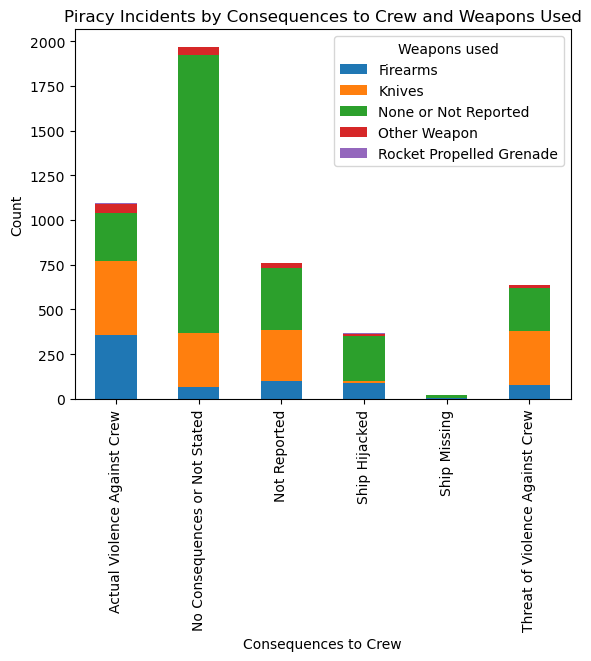

In [44]:
C_Crew_wpns_used = piracy_df_original.groupby(['Consequences to Crew', 'Weapons Used']).size().unstack(fill_value=0)

# Plot the bar graph
C_Crew_wpns_used.plot(kind='bar', stacked=True)
plt.xlabel('Consequences to Crew')
plt.ylabel('Count')
plt.title('Piracy Incidents by Consequences to Crew and Weapons Used')
plt.legend(title='Weapons used')
plt.show()

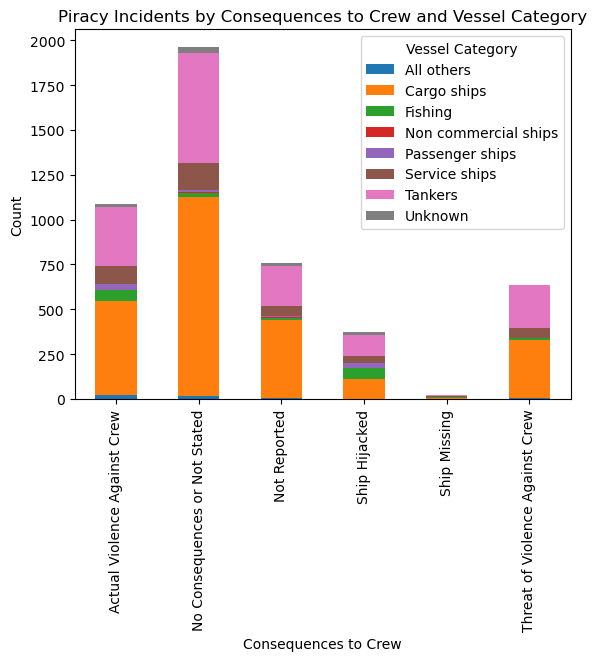

In [45]:
#Bid picture across the globe. 

severity_vessel_counts = piracy_df_original.groupby(['Consequences to Crew', 'Vessel Category']).size().unstack(fill_value=0)

# Plot the bar graph
severity_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Consequences to Crew')
plt.ylabel('Count')
plt.title('Piracy Incidents by Consequences to Crew and Vessel Category')
plt.legend(title='Vessel Category')
plt.show()

### By vessel cateogry  Bokeh,

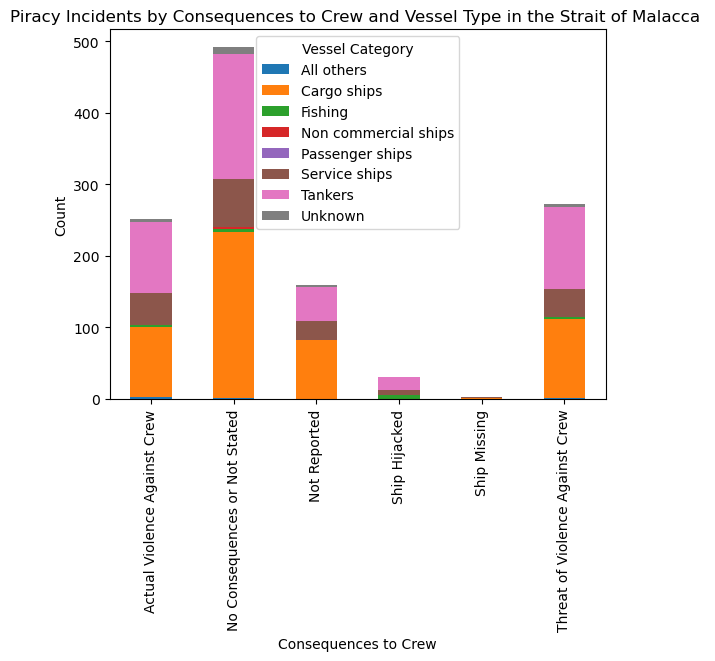

In [46]:

SM_vessel_counts = strait_malacca_df.groupby(['Consequences to Crew', 'Vessel Category']).size().unstack(fill_value=0)

# Plot the bar graph
SM_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Consequences to Crew')
plt.ylabel('Count')
plt.title('Piracy Incidents by Consequences to Crew and Vessel Type in the Strait of Malacca ')
plt.legend(title='Vessel Category')
plt.show()

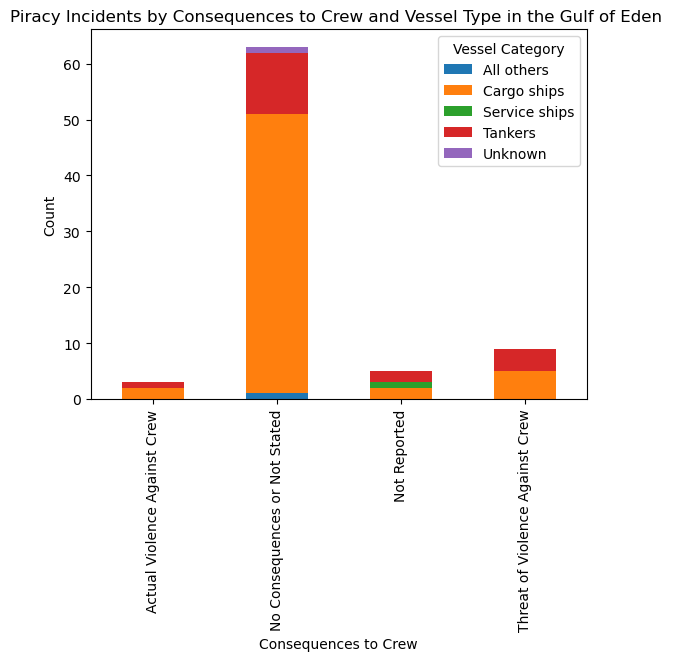

In [47]:
GE_vessel_counts = gulf_of_eden_df.groupby(['Consequences to Crew', 'Vessel Category']).size().unstack(fill_value=0)

# Plot the bar graph
GE_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Consequences to Crew')
plt.ylabel('Count')
plt.title('Piracy Incidents by Consequences to Crew and Vessel Type in the Gulf of Eden ')
plt.legend(title='Vessel Category')
plt.show()

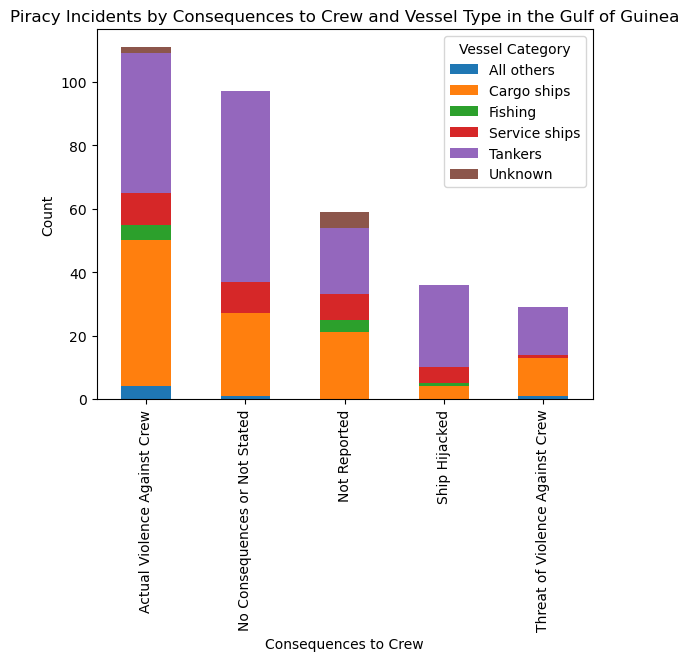

In [48]:
GG_vessel_counts = gulf_of_guinea_df.groupby(['Consequences to Crew', 'Vessel Category']).size().unstack(fill_value=0)

# Plot the bar graph
GG_vessel_counts.plot(kind='bar', stacked=True)
plt.xlabel('Consequences to Crew')
plt.ylabel('Count')
plt.title('Piracy Incidents by Consequences to Crew and Vessel Type in the Gulf of Guinea')
plt.legend(title='Vessel Category')
plt.show()

In [105]:
###GG
gulf_of_guinea_source = ColumnDataSource(data=dict(
    x=GG_vessel_counts.index.tolist(),
    Service_ships=GG_vessel_counts['Service ships'].tolist(),
    Cargo_ships=GG_vessel_counts['Cargo ships'].tolist(),
    Tankers=GG_vessel_counts['Tankers'].tolist(),
    Unknown=GG_vessel_counts['Unknown'].tolist(),
    Fishing=GG_vessel_counts['Fishing'].tolist(),
    All_others=GG_vessel_counts['All others'].tolist()
))
v1 = figure(x_range=GG_vessel_counts.index.tolist(), title="Piracy Incidents by Consequences to Crew and Vessel Category in the Gulf of Guinea", height=800, width=800)

v1.vbar_stack(['Service_ships', 'Cargo_ships', 'Tankers', 'Unknown', 'Fishing',
       'All others'], x='x', color=['blue', 'green', 'red', 'purple', 'orange', 'yellow'], width=0.5, source=gulf_of_guinea_source, legend_label=['Service ships', 'Cargo ships', 'Tankers', 'Unknown', 'Fishing',
       'All others'])
v1.xaxis.major_label_orientation = "vertical"

####GE
gulf_of_eden_source = ColumnDataSource(data=dict(
    x=GE_vessel_counts.index.tolist(),
    Service_ships=GE_vessel_counts['Service ships'].tolist(),
    Cargo_ships=GE_vessel_counts['Cargo ships'].tolist(),
    Tankers=GE_vessel_counts['Tankers'].tolist(),
    Unknown=GE_vessel_counts['Unknown'].tolist(),
    All_others=GE_vessel_counts['All others'].tolist()
)) #no fishing vessels to account for 
v2 = figure(x_range=GE_vessel_counts.index.tolist(), title="Piracy Incidents by Consequences to Crew and Vessel Category in the Gulf of Eden", height=800, width=800)

v2.vbar_stack(['Service_ships', 'Cargo_ships', 'Tankers', 'Unknown', 'Fishing',
       'All others'], x='x', width=0.5, color=['blue', 'green', 'red', 'purple', 'orange', 'yellow'],source=gulf_of_eden_source, legend_label=['Service ships', 'Cargo ships', 'Tankers', 'Unknown', 'Fishing','All others'])
v2.xaxis.major_label_orientation = "vertical"
#######SM
strait_malacca_source = ColumnDataSource(data=dict(
    x=SM_vessel_counts.index.tolist(),
    Service_ships=SM_vessel_counts['Service ships'].tolist(),
    Cargo_ships=SM_vessel_counts['Cargo ships'].tolist(),
    Tankers=SM_vessel_counts['Tankers'].tolist(),
    Unknown=SM_vessel_counts['Unknown'].tolist(),
    Fishing=SM_vessel_counts['Fishing'].tolist(),
    All_others=SM_vessel_counts['All others'].tolist()
))
v3 = figure(x_range=SM_vessel_counts.index.tolist(), title="Piracy Incidents byConsequences to Crew and Vessel Category in the Strait of Malacca", height=800, width=800)

v3.vbar_stack(['Service_ships', 'Cargo_ships', 'Tankers', 'Unknown', 'Fishing',
       'All others'], x='x', width=0.5, color=['blue', 'green', 'red', 'purple', 'orange', 'yellow'],source=strait_malacca_source, legend_label=['Service ships', 'Cargo ships', 'Tankers', 'Unknown', 'Fishing', 'All others'])
v3.xaxis.major_label_orientation = "vertical"
#MAKE TABS 
tab_1 = TabPanel(child=v1, title="Gulf of Guinea")
tab_2= TabPanel(child=v2, title="Gulf of Eden")
tab_3= TabPanel(child=v3, title="Strait of Malacca")
tabs= Tabs(tabs=[tab_1, tab_2, tab_3])
show(tabs)

output_file('vessel_cat_tabs.html')

In [ ]:
category'Service ships', 'Cargo ships', 'Tankers', 'Unknown', 'Fishing',
       'All others']

### By Wpns Used  Bokeh,

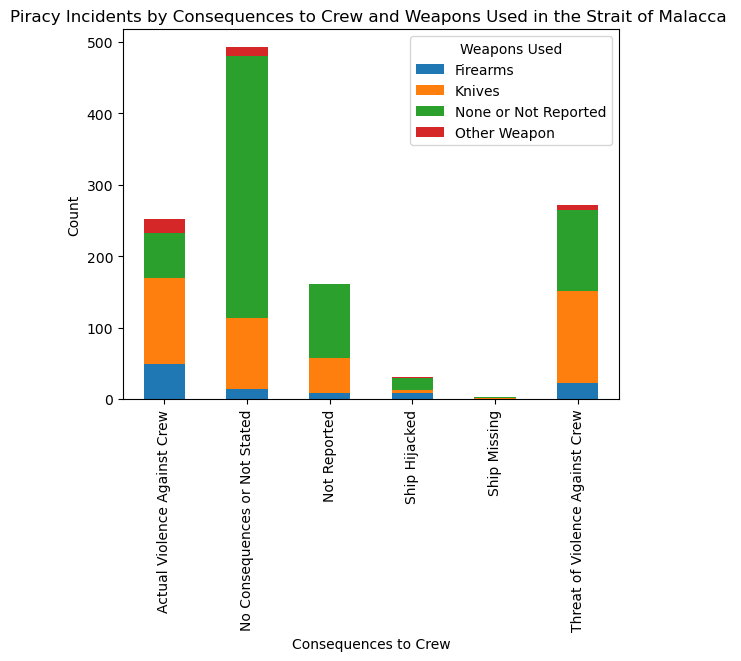

In [66]:
SM_wpns = strait_malacca_df.groupby(['Consequences to Crew', 'Weapons Used']).size().unstack(fill_value=0)
#add better color scheme 

# Plot the bar graph
SM_wpns.plot(kind='bar', stacked=True)
plt.xlabel('Consequences to Crew')
plt.ylabel('Count')
plt.title('Piracy Incidents by Consequences to Crew and Weapons Used in the Strait of Malacca ')
plt.legend(title='Weapons Used')
plt.show()

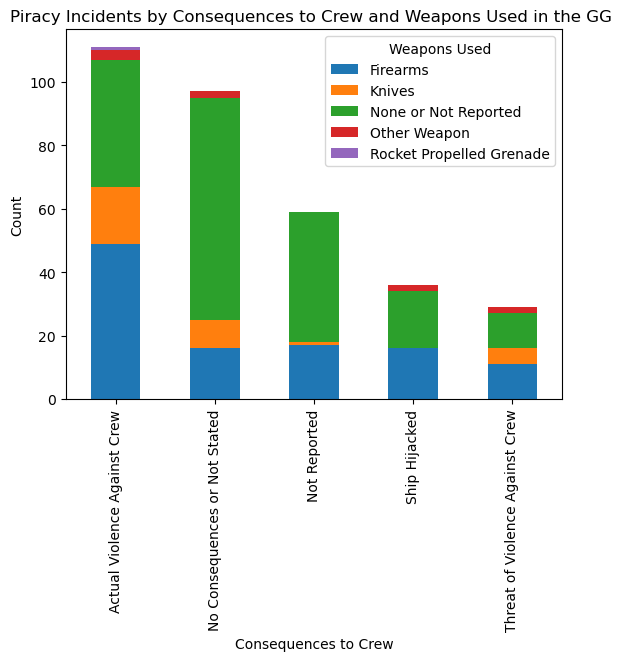

In [68]:
GG_wpns = gulf_of_guinea_df.groupby(['Consequences to Crew', 'Weapons Used']).size().unstack(fill_value=0)
#add better color scheme 

# Plot the bar graph
GG_wpns.plot(kind='bar', stacked=True)
plt.xlabel('Consequences to Crew')
plt.ylabel('Count')
plt.title('Piracy Incidents by Consequences to Crew and Weapons Used in the GG ')
plt.legend(title='Weapons Used')
plt.show()

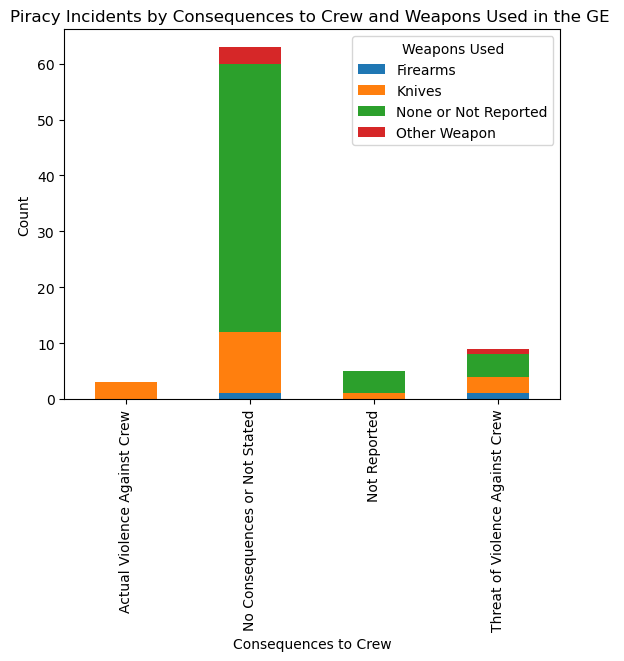

In [69]:
GE_wpns = gulf_of_eden_df.groupby(['Consequences to Crew', 'Weapons Used']).size().unstack(fill_value=0)
#add better color scheme 

# Plot the bar graph
GE_wpns.plot(kind='bar', stacked=True)
plt.xlabel('Consequences to Crew')
plt.ylabel('Count')
plt.title('Piracy Incidents by Consequences to Crew and Weapons Used in the GE ')
plt.legend(title='Weapons Used')
plt.show()

In [73]:
gulf_of_eden_df['Weapons Used'].unique()

array(['Other Weapon', 'None or Not Reported', 'Knives', 'Firearms'],
      dtype=object)

In [90]:
###GG
gulf_of_guinea_source = ColumnDataSource(data=dict(
    x=GG_wpns.index.tolist(),
    Other_Weapon=GG_wpns['Other Weapon'].tolist(),
    None_or_Not_Reported=GG_wpns['None or Not Reported'].tolist(),
    Knives=GG_wpns['Knives'].tolist(),
    Firearms=GG_wpns['Firearms'].tolist(),
)) 
a1 = figure(x_range=GG_wpns.index.tolist(), title="Piracy Incidents by Consequences to Crew and Weapons Used in the Gulf of Guinea", height=800, width=800)

a1.vbar_stack(['Other_Weapon', 'None_or_Not_Reported', 'Knives', 'Firearms'], x='x', color=['blue', 'green', 'red', 'purple'], width=0.5, source=gulf_of_guinea_source, 
              legend_label=['Other Weapon', 'None or Not Reported', 'Knives', 'Firearms'])
a1.xaxis.major_label_orientation = "vertical"

####GE
gulf_of_eden_source = ColumnDataSource(data=dict(
    x=GE_wpns.index.tolist(),
    Other_Weapon=GE_wpns['Other Weapon'].tolist(),
    None_or_Not_Reported=GE_wpns['None or Not Reported'].tolist(),
    Knives=GE_wpns['Knives'].tolist(),
    Firearms=GE_wpns['Firearms'].tolist(),
)) 
a2 = figure(x_range=GE_wpns.index.tolist(), title="Piracy Incidents by Consequences to Crew and Weapons Used in the Gulf of Guinea", height=800, width=800)

a2.vbar_stack(['Other_Weapon', 'None_or_Not_Reported', 'Knives', 'Firearms'], x='x', color=['blue', 'green', 'red', 'purple'], width=0.5, source=gulf_of_eden_source, 
              legend_label=['Other Weapon', 'None or Not Reported', 'Knives', 'Firearms'])
a2.xaxis.major_label_orientation = "vertical"

#######SM
strait_malacca_source = ColumnDataSource(data=dict(
    x=SM_wpns.index.tolist(),
    Other_Weapon=SM_wpns['Other Weapon'].tolist(),
    None_or_Not_Reported=SM_wpns['None or Not Reported'].tolist(),
    Knives=SM_wpns['Knives'].tolist(),
    Firearms=SM_wpns['Firearms'].tolist(),
)) 
a3 = figure(x_range=SM_wpns.index.tolist(), title="Piracy Incidents by Consequences to Crew and Weapons Used in the Gulf of Guinea", height=800, width=800)

a3.vbar_stack(['Other_Weapon', 'None_or_Not_Reported', 'Knives', 'Firearms'], x='x', color=['blue', 'green', 'red', 'purple'], width=0.5, source=strait_malacca_source, 
              legend_label=['Other Weapon', 'None or Not Reported', 'Knives', 'Firearms'])
a3.xaxis.major_label_orientation = "vertical"


#MAKE TABS 
tab_1 = TabPanel(child=a1, title="Gulf of Guinea")
tab_2= TabPanel(child=a2, title="Gulf of Eden")
tab_3= TabPanel(child=a3, title="Strait of Malacca")
tabs= Tabs(tabs=[tab_1, tab_2, tab_3])
show(tabs)

output_file("Wpns_tabs.html")


NameError: name 'save' is not defined

### Bokeh Severity by Ship Flag 

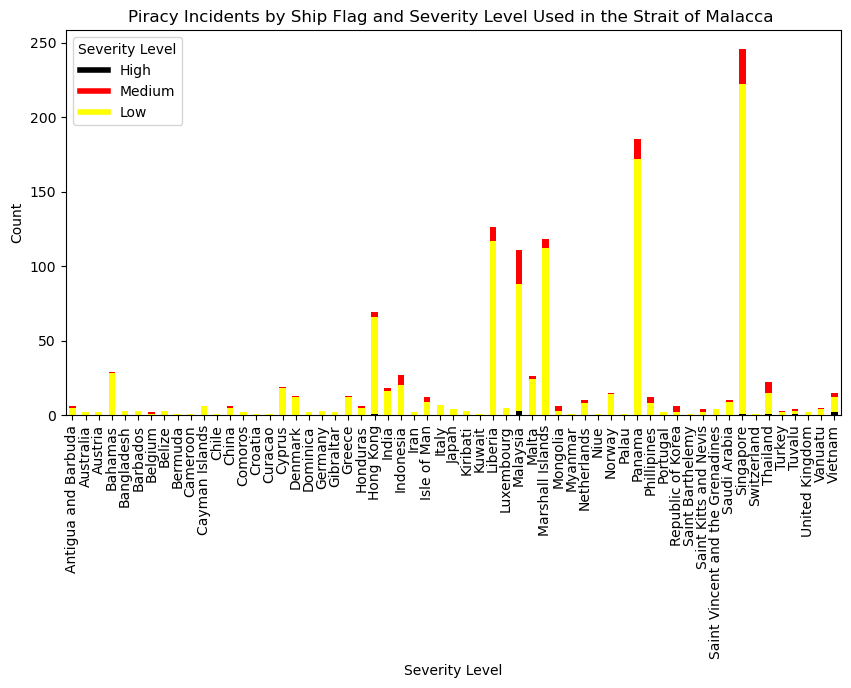

In [93]:
strait_malacca_SF_severity = strait_malacca_df.groupby(['Ship Flag', 'severity']).size().unstack(fill_value=0)


colors = {'high': 'black', 'medium': 'red', 'low': 'yellow'}

# Plot the bar graph with custom colors
ax1 = strait_malacca_SF_severity.plot(kind='bar', figsize = (10,5), stacked=True, color=[colors[col] for col in strait_malacca_SF_severity.columns])

plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Ship Flag and Severity Level Used in the Strait of Malacca ')
high_patch = plt.Line2D([0], [0], color='black', lw=4)
medium_patch = plt.Line2D([0], [0], color='red', lw=4)
low_patch = plt.Line2D([0], [0], color='yellow', lw=4)

plt.legend([high_patch, medium_patch, low_patch], ['High', 'Medium', 'Low'], title='Severity Level')

#plt.legend(title='Severity Level')
plt.show()

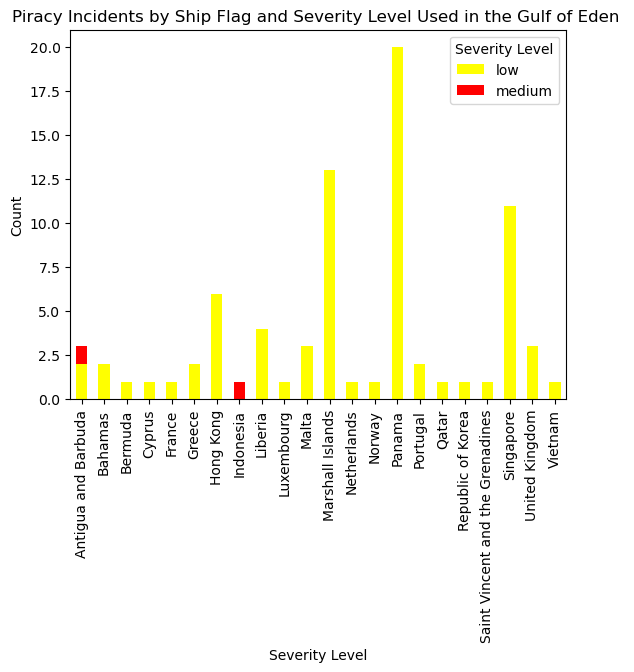

In [94]:
gulf_of_eden_SF_severity = gulf_of_eden_df.groupby(['Ship Flag', 'severity']).size().unstack(fill_value=0)

#severity_vessel_counts.plot(kind='bar', stacked=True)
colors = {'high': 'black', 'medium': 'red', 'low': 'yellow'}

# Plot the bar graph with custom colors
ax2 = gulf_of_eden_SF_severity.plot(kind='bar', stacked=True, color=[colors[col] for col in gulf_of_eden_SF_severity.columns])

plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Ship Flag and Severity Level Used in the Gulf of Eden ')
plt.legend(title='Severity Level')
plt.show()

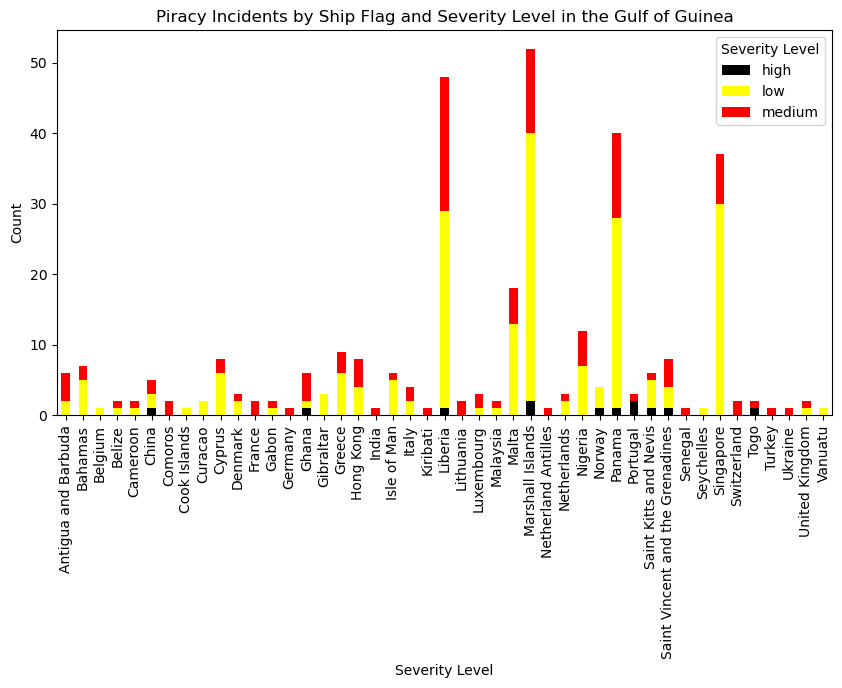

In [95]:
gulf_of_guinea_SF_severity = gulf_of_guinea_df.groupby(['Ship Flag', 'severity']).size().unstack(fill_value=0)

#severity_vessel_counts.plot(kind='bar', stacked=True)
colors = {'high': 'black', 'medium': 'red', 'low': 'yellow'}

# Plot the bar graph with custom colors
ax3 = gulf_of_guinea_SF_severity.plot(kind='bar', figsize = (10,5), stacked=True, color=[colors[col] for col in gulf_of_guinea_SF_severity.columns])

# Plot the bars again to add black borders

plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.title('Piracy Incidents by Ship Flag and Severity Level in the Gulf of Guinea')
plt.legend(title='Severity Level')
plt.show()

In [96]:
gulf_of_guinea_source = ColumnDataSource(data=dict(
    x=gulf_of_guinea_SF_severity.index.tolist(),
    high=gulf_of_guinea_SF_severity['high'].tolist(),
    medium=gulf_of_guinea_SF_severity['medium'].tolist(),
    low=gulf_of_guinea_SF_severity['low'].tolist()
))

In [97]:
p1 = figure(x_range=gulf_of_guinea_SF_severity.index.tolist(), title="Piracy Incidents by Ship Flag and Severity Level in the Gulf of Guinea", height=350, width=1000)
p1.vbar_stack(['high', 'medium', 'low'], x='x', width=0.5, color=['black', 'red', 'yellow'], source=gulf_of_guinea_source, legend_label=['High', 'Medium', 'Low'])
p1.xaxis.major_label_orientation = "vertical"

In [98]:
gulf_of_eden_source = ColumnDataSource(data=dict(
    x=gulf_of_eden_SF_severity.index.tolist(),
    medium=gulf_of_eden_SF_severity['medium'].tolist(),
    low=gulf_of_eden_SF_severity['low'].tolist()
))

In [99]:
p2 = figure(x_range=gulf_of_eden_SF_severity.index.tolist(), title="Piracy Incidents by Ship Flag and Severity Level in the Gulf of Eden", height=350, width=1000)
p2.vbar_stack(['high', 'medium', 'low'], x='x', width=0.5, color=['black', 'red', 'yellow'], source=gulf_of_eden_source, legend_label=['High', 'Medium', 'Low'])
p2.xaxis.major_label_orientation = "vertical"

In [100]:
strait_malacca_source = ColumnDataSource(data=dict(
    x=strait_malacca_SF_severity.index.tolist(),
    high=strait_malacca_SF_severity['high'].tolist(),
    medium=strait_malacca_SF_severity['medium'].tolist(),
    low=strait_malacca_SF_severity['low'].tolist()
))

In [101]:
p3 = figure(x_range=strait_malacca_SF_severity.index.tolist(), title="Piracy Incidents by Ship Flag and Severity Level in the Strait of Malacca", height=350, width=1000)
p3.vbar_stack(['high', 'medium', 'low'], x='x', width=0.5, color=['black', 'red', 'yellow'], source=strait_malacca_source, legend_label=['High', 'Medium', 'Low'])
p3.xaxis.major_label_orientation = "vertical"

In [103]:
tab1 = TabPanel(child=p1, title="Gulf of Guinea")
tab2 = TabPanel(child=p2, title="Gulf of Eden")
tab3 = TabPanel(child=p3, title="Strait of Malacca")
tabs = Tabs(tabs=[tab1, tab2, tab3])

output_file('severity_tabs.html')

In [ ]:
show(tabs)

### All DataFrames created: